# Setup

Utility section to read if you want to run this notebook.

The packages needed to run this notebook are listed in the requirements.txt file.

In a terminal, after having created a new envrionment, you can simply run:
```
pip install -r requirements.txt
```

For the notebook to work properly, you must place it in the same folder as the `model_torch.pth`, `utils.py`, `rossler_map.py` and `time_series.py` files.


# Packages Imports

In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch
from rossler_map import RosslerMap
from time_series import FinalModel
from utils import Dynamics, Statistics, compute_traj, plot3D_traj

# Load models

Load trained model

In [2]:
checkpoint_path = Path("trained_model.ckpt")

trained_model = FinalModel.load_from_checkpoint(checkpoint_path=checkpoint_path)

trained_model.normalize = False
trained_model.eval()

FinalModel(
  (layers): Sequential(
    (0): Linear(in_features=3, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=15, bias=True)
    (3): ReLU()
    (4): Linear(in_features=15, out_features=15, bias=True)
    (5): ReLU()
    (6): Linear(in_features=15, out_features=3, bias=True)
  )
)

In [3]:
# checkpoint_path = Path("model.pth")

# trained_model = FinalModel(
#     hidden_size=15,
#     delta_t=0.001,
#     mean=np.array([0.1756855, -0.87666973, 0.87665153]),
#     std=np.array([5.11818165, 4.81725634, 2.88779878]),
# )

# trained_model.load_state_dict(torch.load(checkpoint_path))
# trained_model.normalize = False
# trained_model.eval()

Load ground thruth model

In [4]:
rossler_map_true = RosslerMap(delta_t=trained_model.hparams.delta_t)

# Set hyperparameters for trajectories

In [5]:
TRAJECTORY_DUR = 1000
nb_steps = int(TRAJECTORY_DUR // trained_model.hparams.delta_t)
init_pos = [
    0.01,
    2.5,
    3.07,
]  # Init position different from the one used for training which was [-5.75, -1.6, 0.02]
save_dir_path = checkpoint_path.parent

## Compute trajectories

In [6]:
traj_pred, traj_true, time_list = compute_traj(trained_model, rossler_map_true, init_pos, nb_steps)
np.save(os.path.join(save_dir_path, "traj_pred_test.npy"), traj_pred)
np.save(os.path.join(save_dir_path, "traj_true_test.npy"), traj_true)
np.save(os.path.join(save_dir_path, "time_list_test.npy"), time_list)

100%|██████████| 999998/999998 [03:41<00:00, 4510.99it/s]


## Load already computed trajectories

In [7]:
traj_pred = np.load(os.path.join(save_dir_path, "traj_pred_test.npy"))
traj_true = np.load(os.path.join(save_dir_path, "traj_true_test.npy"))
time_list = np.load(os.path.join(save_dir_path, "time_list_test.npy"))

# Compute metrics

## Statistics

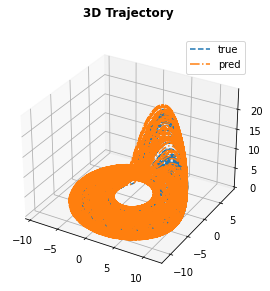

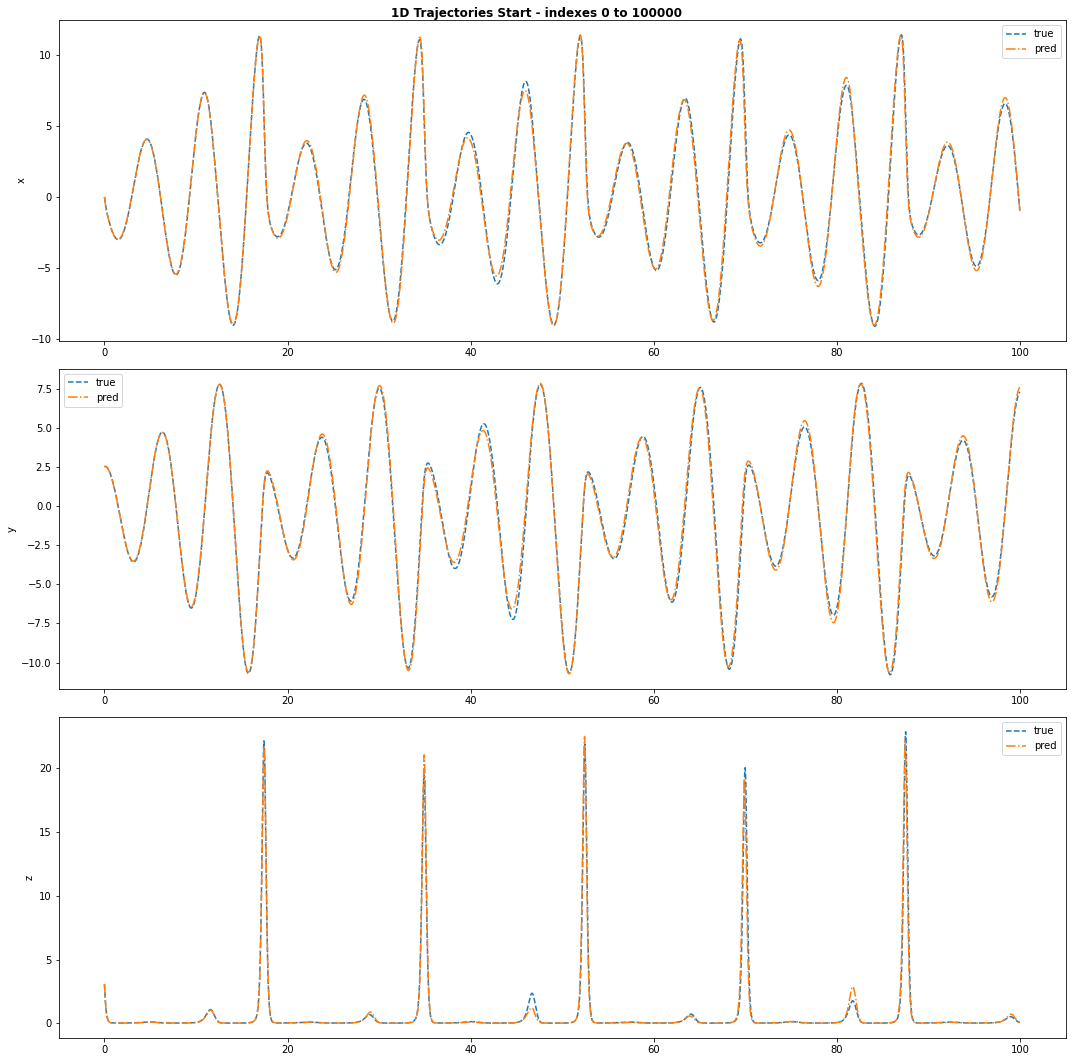

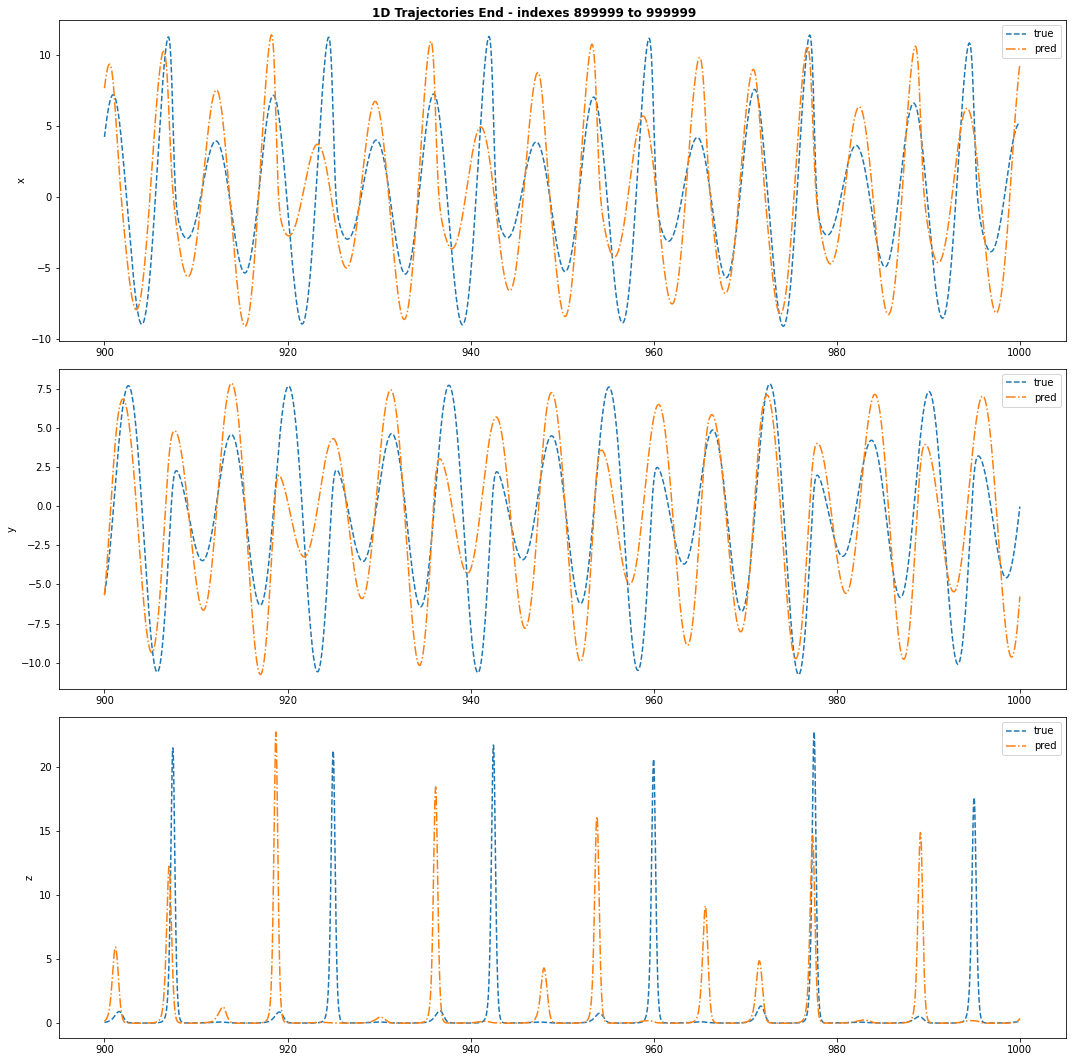

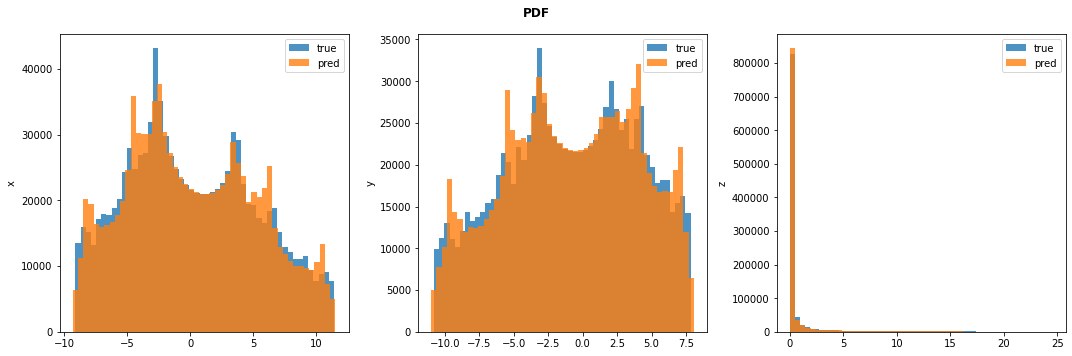

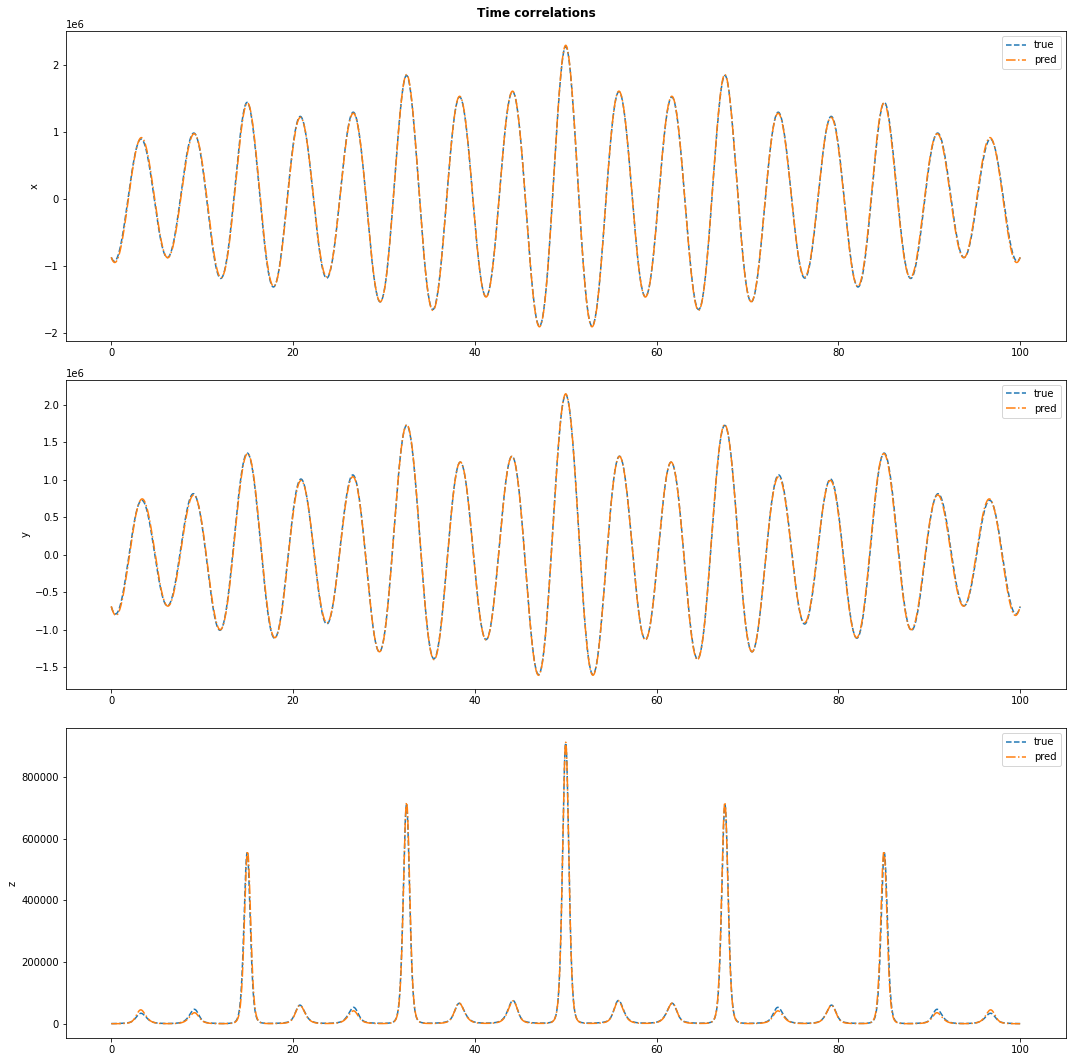

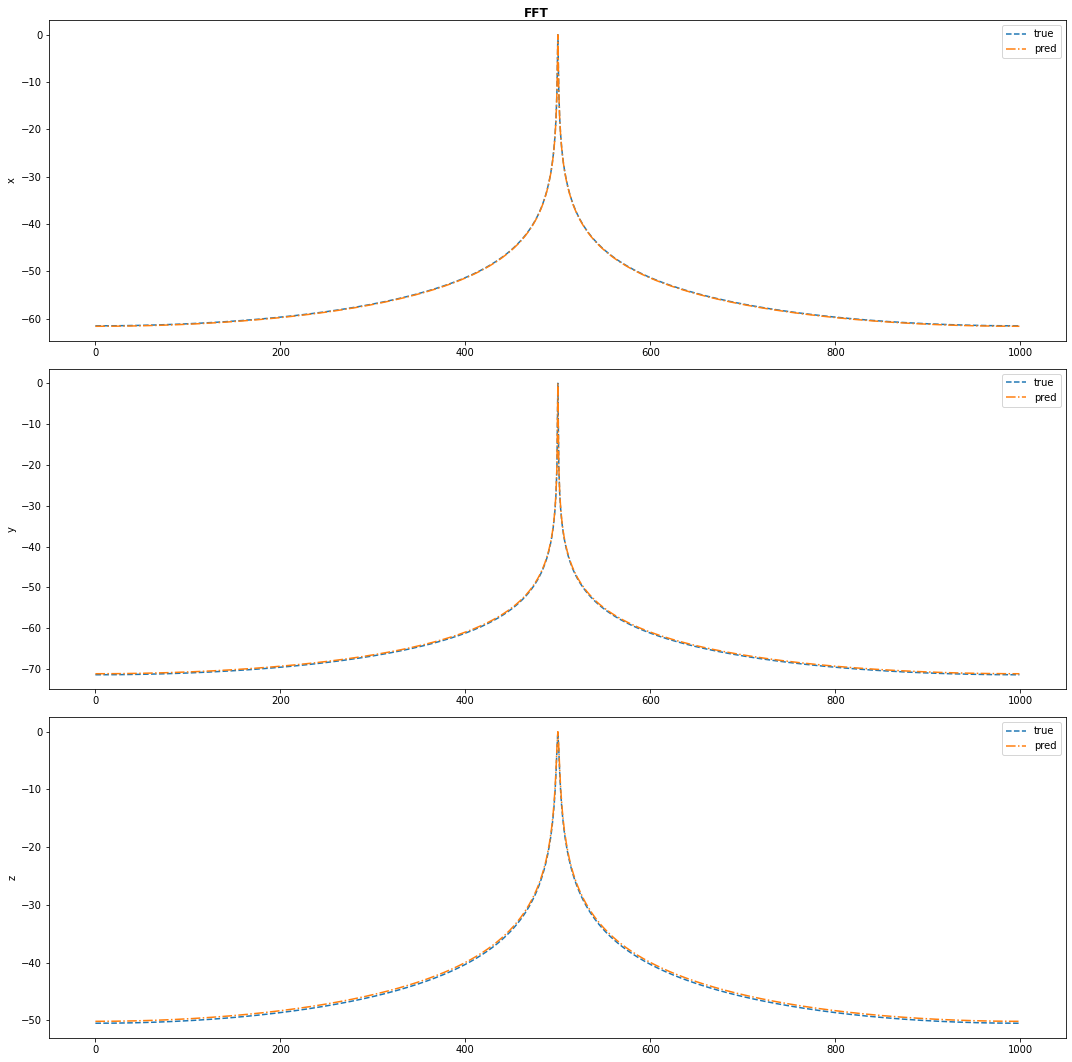

In [8]:
stats = Statistics(wandb_logger=None, ts_n=100000)
stats.add_traj(traj_true=traj_true, traj_pred=traj_pred, time_list=time_list)
stats.plot_all()

## Dynamics

In [9]:
dym = Dynamics(
    wandb_logger=None, true_model=rossler_map_true, trained_model=trained_model, max_it=nb_steps
)
dym.add_traj(traj_true=traj_true, traj_pred=traj_pred)
dym.plot_all()

  0%|          | 46/999999 [00:00<36:19, 458.77it/s]

Start computation of Lyaponuv exponent on the predicted trajectory...


  0%|          | 91/999999 [00:00<18:20, 908.67it/s]

Start computation of Lyaponuv exponent on the true trajectory...


  0%|          | 45/100000 [00:00<03:46, 441.32it/s]

lyap_true: [ 6.32855002e-02  3.57661490e-03 -5.39351173e+00],
lyap_pred: [ 0.06673499  0.00454373 -2.664535  ],
lyap_error : [3.44949334e-03 9.67111477e-04 2.72897673e+00]
Start computation of one of the equilibrum point on the predicted trajectory...


100%|██████████| 100000/100000 [03:17<00:00, 506.96it/s]

fix_point_true: [ 0.0070262  -0.03513102  0.03513102],
fix_point_pred: [ 0.00190969  0.00800913 -0.00222132],
fix_point_error : [0.00511651 0.04314016 0.03735234]
